<a href="https://colab.research.google.com/github/TruongScotl/Data-Analysis-Practice/blob/main/Data_Analysis_programming_p6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('/content/dulieuxettuyendaihoc.csv', header =0, delimiter =',')
print(df[['DH1','DH2','DH3']])

     DH1   DH2   DH3
0   3.25  3.25  4.50
1   6.00  4.00  3.50
2   5.00  6.75  4.00
3   4.25  4.25  5.25
4   4.25  4.50  5.00
..   ...   ...   ...
95  5.25  1.50  6.25
96  5.25  3.75  4.75
97  7.00  8.00  4.00
98  5.00  3.50  5.50
99  5.25  2.50  4.25

[100 rows x 3 columns]


Dựa vào điểm thi năm 2021 - Trường đại học IUH, cần tuyển những học sinh có điểm thi sao cho phù hợp với nhu cầu đào tạo của trường. 
* Trường IUH thấy rằng ban tuyển sinh ưu tiên DH3 tốt và DH1 vừa đủ. Hãy đưa ra khuyến nghị đề xuất các nhóm học sinh có kết quả phù hợp.

Cần phải biết cách đặt câu hỏi: thế nào là tốt ? thế nào là vừa đủ ? nhóm học sinh có kết quả phù hợp ?

In [51]:
# split to 3 group is good ? Need method to choice best number of group
from kneed import KneeLocator
sse = []
kmeans_kwargs = {'init': 'random', 'n_init':10,
                 'max_iter':300, 'random_state':42}
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
  kmeans.fit(data)
  sse.append(kmeans.inertia_)
kl = KneeLocator(range(1,11), sse, curve = 'convex', direction = 'decreasing')
print("Số cụm đạt tốt nhất: ", kl.elbow)

Số cụm đạt tốt nhất:  4


In [52]:
#Gom cụm --> Kmeans
data = df[['DH1', 'DH2', 'DH3']]
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4).fit(data)

print(kmeans.cluster_centers_)
print(kmeans.labels_[:])

[[2.14285714 4.24107143 5.375     ]
 [6.10714286 6.46428571 5.07142857]
 [3.59210526 4.39473684 4.05263158]
 [4.99074074 3.5        5.46296296]]
[2 3 1 3 2 0 1 2 3 2 0 1 0 0 0 3 2 2 2 2 2 2 3 1 3 3 3 2 2 0 3 3 2 0 0 0 2
 0 0 2 3 3 3 0 2 0 3 1 3 2 2 0 2 0 3 2 1 0 0 2 0 2 2 0 3 0 2 3 2 0 0 2 0 2
 3 2 2 2 2 0 3 2 2 0 3 2 0 0 2 0 3 2 2 2 3 3 3 1 3 3]


In [53]:
df['Group'] = kmeans.labels_[:]
print(df[['DH1','DH2','DH3','Group']])

     DH1   DH2   DH3  Group
0   3.25  3.25  4.50      2
1   6.00  4.00  3.50      3
2   5.00  6.75  4.00      1
3   4.25  4.25  5.25      3
4   4.25  4.50  5.00      2
..   ...   ...   ...    ...
95  5.25  1.50  6.25      3
96  5.25  3.75  4.75      3
97  7.00  8.00  4.00      1
98  5.00  3.50  5.50      3
99  5.25  2.50  4.25      3

[100 rows x 4 columns]


In [54]:
df_analysis = df[['DH1', 'DH2', 'DH3','Group']]
df_analysis.head()

,DH1,DH2,DH3,Group
0,3.25,3.25,4.50,2
1,6.00,4.00,3.50,3
2,5.00,6.75,4.00,1
3,4.25,4.25,5.25,3
4,4.25,4.50,5.00,2


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

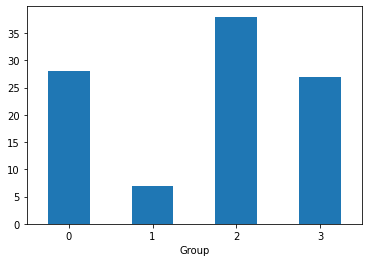

In [55]:
import matplotlib.pyplot as plt
gr_count = df_analysis.groupby(['Group']).size()
gr_count.plot.bar()
plt.xticks(rotation = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

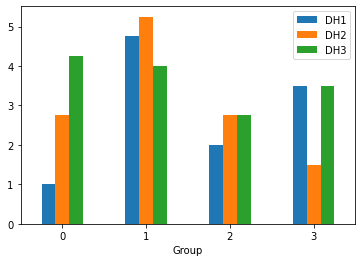

In [56]:
gr_min = df_analysis.groupby(['Group'])['DH1','DH2','DH3'].min()
gr_min.plot(kind='bar')
plt.xticks(rotation = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

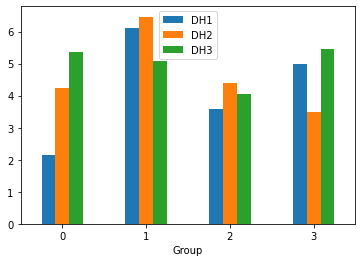

In [57]:
gr_mean = df_analysis.groupby(['Group'])['DH1','DH2','DH3'].mean()
gr_mean.plot(kind='bar')
plt.xticks(rotation = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

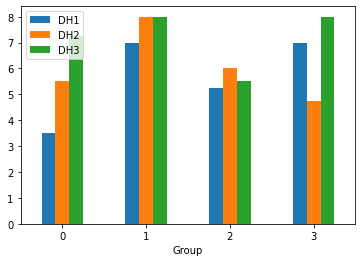

In [58]:
gr_max = df_analysis.groupby(['Group'])['DH1','DH2','DH3'].max()
gr_max.plot(kind='bar')
plt.xticks(rotation = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

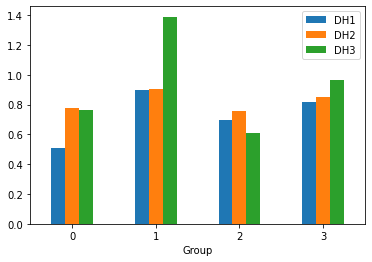

In [59]:
gr_std = df_analysis.groupby(['Group'])['DH1','DH2','DH3'].std()
gr_std.plot(kind='bar')
plt.xticks(rotation = 0)

In [59]:
# inference causal, lasso, partial dependent chart